```
Topic:        Challenge Set 5
Subject:      Linear Regression and Train/Test Split challenges
Date:         10/16/2018
Name:         Goodwin Chen
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

/home/goodwin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/goodwin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/goodwin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('2013_movies.csv')

## Challenge 1

In [30]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [33]:
df['Budget'] = df.Budget.fillna(df.Budget.mean())

In [34]:
X0 = np.ones(df.shape[0]).reshape(-1, 1)
y = df.DomesticTotalGross
lm0 = LinearRegression()
lm0.fit(X0, y)
y_pred = lm0.predict(X0)

Text(0,0.5,'predicted values')

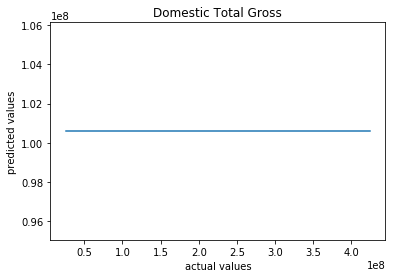

In [35]:
#it predicts the mean of the DomesticTotalGross column
plt.plot(y, y_pred)
plt.title('Domestic Total Gross')
plt.xlabel('actual values')
plt.ylabel('predicted values')

(array([47., 21., 15.,  3.,  3.,  4.,  3.,  0.,  1.,  3.]),
 array([-7.50286242e+07, -3.51186446e+07,  4.79133498e+06,  4.47013146e+07,
         8.46112942e+07,  1.24521274e+08,  1.64431253e+08,  2.04341233e+08,
         2.44251213e+08,  2.84161192e+08,  3.24071172e+08]),
 <a list of 10 Patch objects>)

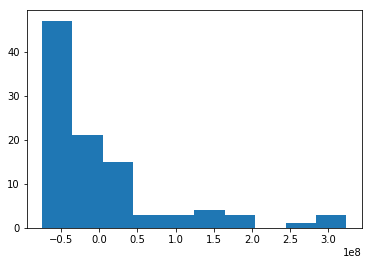

In [36]:
plt.hist(y-y_pred)

The residuals have a right-skewed distribution

## Challenge 2

In [68]:
X1 = df[['Budget']]
lm1 = LinearRegression()
lm1.fit(X1, y)
y_pred = lm1.predict(X1)

In [69]:
lm1.score(X1, y)

0.25294062651022153

Text(0,0.5,'Domestic Total Gross')

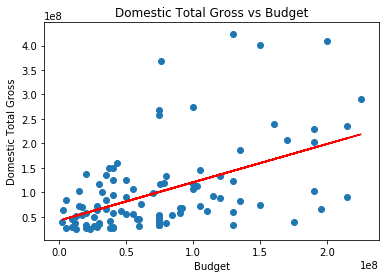

In [44]:
plt.plot(X1, y_pred, c='r')
plt.scatter(X1, y)
plt.title('Domestic Total Gross vs Budget')
plt.xlabel('Budget')
plt.ylabel('Domestic Total Gross')

Text(0,0.5,'Actual DTG minus predicted')

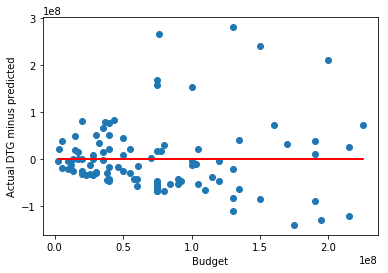

In [50]:
plt.scatter(X1, y-y_pred)
plt.plot(X1, np.zeros(X1.shape[0]), c='r')
plt.xlabel('Budget')
plt.ylabel('Actual DTG minus predicted')

the variance in the residuals is non constant (heteroskedastic)

## Challenge 3

In [55]:
df = pd.concat([df, pd.get_dummies(df.Rating)], axis=1)

In [58]:
X2 = df[['G', 'PG', 'PG-13', 'R']]
lm2 = LinearRegression()
lm2.fit(X2, y)
y_pred = lm2.predict(X2)

In [63]:
lm2.score(X2, y)

0.10922931211582164

By itself, the ratings don't add that much prediction value.

## Challenge 4

In [65]:
X3 = df[['Budget', 'Runtime', 'G', 'PG', 'PG-13', 'R']]
lm3 = LinearRegression()
lm3.fit(X3, y)
y_pred = lm3.predict(X3)

In [66]:
lm3.score(X3, y)

0.3319784622814427

## Challenge 5

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X3,y)
lm3.fit(X_train, y_train)
y_pred = lm3.predict(X_test)
lm3.score(X_test, y_test)

0.28435943277023157

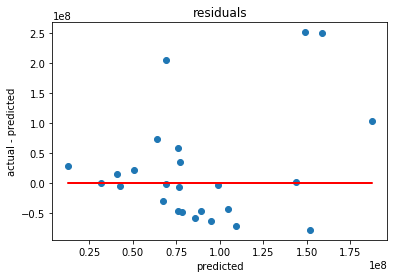

In [112]:
plt.scatter(y_pred, y_test-y_pred)
plt.title('residuals')
plt.xlabel('predicted')
plt.ylabel('actual - predicted')
plt.plot(y_pred, np.zeros_like(y_pred), c='r')